In [1]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy
import matplotlib.animation as animation
plt.close('all') 


In [2]:
df40000 = pd.read_csv('stats/stats_0.04_40000.csv')
df20000 = pd.read_csv('stats/stats_0.04_20000.csv')
df10000 = pd.read_csv('stats/stats_0.04_10000.csv')
df5000 = pd.read_csv('stats/stats_0.04_5000.csv')

#max(df['number of actors'].unique())

#df.loc[df['number of actors']==4]['number of steps'].mean()
df5000['number of actors'].unique()

array([ 4,  6,  8, 10, 12, 14, 16, 18, 20, 30, 40, 50, 60, 75])

In [3]:
okabe_ito = ['#000000','#E69F00','#56B4E9','#009E73','#F0E442','#0072B2','#D55E00','#CC79A7']
c_sequential = ['#fff7fb','#ece7f2','#d0d1e6','#a6bddb','#74a9cf','#3690c0','#0570b0','#045a8d','#023858']
c_diverging = ['#9e0142','#d53e4f','#f46d43','#fdae61','#fee08b','#ffffbf','#e6f598','#abdda4','#66c2a5','#3288bd','#5e4fa2']
cmaplist = okabe_ito

def plot_column_per_n_of_actors(df,col,n_of_bins,xmin=None,xmax=None,n_actors=None):
    if xmin is None:
        xmin = (min(df[col]))
    if xmax is None:
        xmax = (max(df[col]))
    if n_actors is None:
        n_actors = range(3,16)
    binwidth = int((xmax-xmin)/float(n_of_bins)) 
    plt.figure(figsize=(15,9));
    binrange = range(xmin, xmax + binwidth, binwidth);
    i_n = 0
    for i in n_actors:
        i_n +=1 
        plt.subplot(len(n_actors),1,i_n)
        ic = i_n
        #ic = int((i_n-1)*float(len(cmaplist))/len(n_actors))
        # ic = int(i*float(len(cmaplist))/max(df['number of actors']))
        plt.title("unweighted histogram of "+col+", "+str(i)+" actors")
        plt.hist(df[df['number of actors']==i][col],
                 color=cmaplist[ic],bins=binrange,
                 #histtype='step',
                 alpha=1,
                 label=str(i)
                 );
    plt.subplots_adjust(hspace = 0.4)
    plt.savefig("img/hist_"+col,dpi=400)
    
    
def plot_f_of_time(df_in):
    plt.figure(figsize=(15,9));
    plt.title("time evolution of")

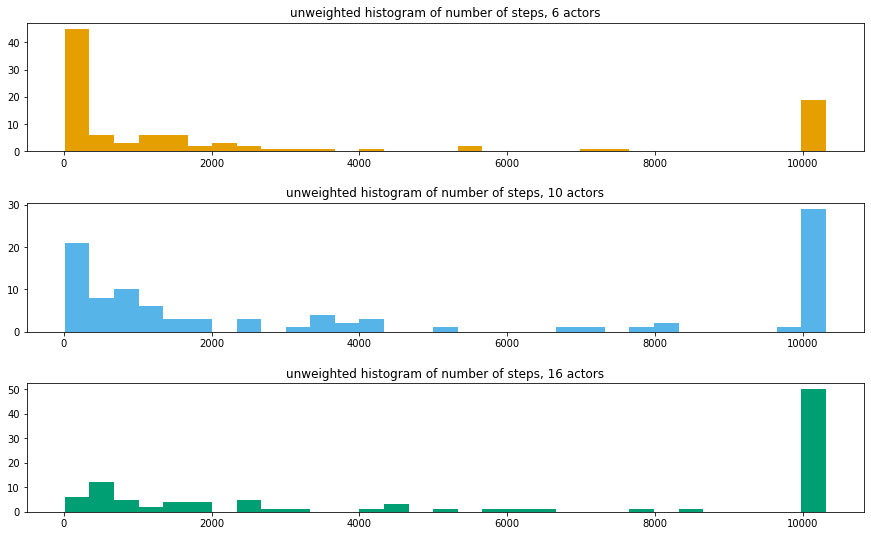

In [4]:
#plot_column_per_n_of_actors('number of steps',40,xmax=3000,n_actors=[5,9,20])
plot_column_per_n_of_actors(df10000,'number of steps',30,n_actors=[6,10,16])

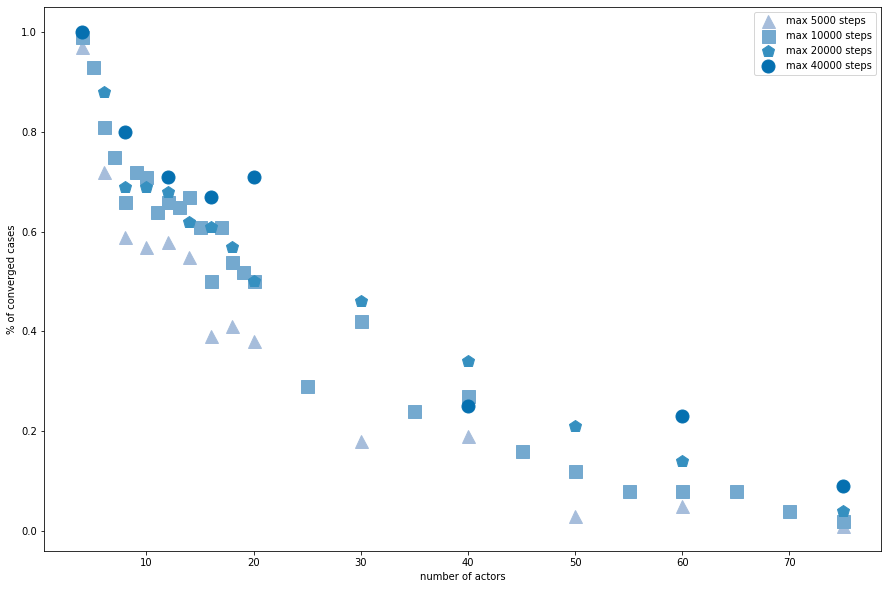

In [33]:
def converged_percentage(datafr):
    stepmax = max(datafr['number of steps'])
    max_n_actors = datafr['number of actors'].unique()[-1] + 1
    range_n_actors = datafr['number of actors'].unique()
    # sum over array of booleans returns number of Trues
    n_of_cases = [sum(datafr['number of actors']==i) for i in range_n_actors]
    mean_steps = [numpy.mean(datafr.loc[datafr['number of actors'] == i]['number of steps']) for i in range_n_actors]
    std_steps = [numpy.std(datafr.loc[datafr['number of actors'] == i]['number of steps']) for i in range_n_actors]
    converged = [sum(datafr.loc[datafr['number of actors'] == i]['number of steps'].values < stepmax) 
                 for i in range_n_actors]
    #print(datafr['number of actors'].unique())
    converged_percentage=[a/b for (a,b) in zip(converged,n_of_cases)]
    return converged_percentage

"""
from Plot_multiple import Plot_multiple
myplot = Plot_multiple(title="perc_converged_cases",figure_size=(15,10),colorscheme='sequential',
                           col_offset=3,path='img/') 


#plt.figure(figsize=(15,10))
myplot.add_line(xdata=df5000['number of actors'].unique(),ydata=converged_percentage(df5000),
                format_string="^",dataname="max 5000 steps")
myplot.add_line(xdata=df10000['number of actors'].unique(),ydata=converged_percentage(df10000),
                format_string="s",dataname="max 10000 steps")
myplot.add_line(xdata=df20000['number of actors'].unique(),ydata=converged_percentage(df20000),
                format_string="p",dataname="max 20000 steps")
myplot.add_line(xdata=df40000['number of actors'].unique(),ydata=converged_percentage(df40000),
                format_string="o",dataname="max 40000 steps")
#plt.plot(range_n_actors,std_steps,'ob',label="")
#plt.legend()
myplot.make_plot("number of actors","% of converged cases")

"""
c_sequential = ['#fff7fb','#ece7f2','#d0d1e6','#a6bddb','#74a9cf','#3690c0','#0570b0','#045a8d','#023858']
plt.figure(figsize=(15,10))
plt.plot(df5000['number of actors'].unique(),converged_percentage(df5000),'^',
                label="max 5000 steps",c=c_sequential[3],markersize=13,alpha=1)
plt.plot(df10000['number of actors'].unique(),converged_percentage(df10000),'s',
                label="max 10000 steps",c=c_sequential[4],markersize=13,alpha=1)
plt.plot(df20000['number of actors'].unique(),converged_percentage(df20000),'p',
                label="max 20000 steps",c=c_sequential[5],markersize=13,alpha=1)
plt.plot(df40000['number of actors'].unique(),converged_percentage(df40000),'o',
                label="max 40000 steps",c=c_sequential[6],markersize=13,alpha=1)
#plt.plot(range_n_actors,std_steps,'ob',label="")
plt.legend()
plt.xlabel("number of actors")
plt.ylabel("% of converged cases")
#plt.show()
plt.savefig('img/perc_converged_cases.png')



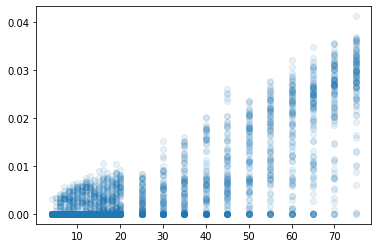

In [6]:
# density plot of final energy in function of # of actors
plt.plot(df10000['number of actors'],df10000['final energy'],'o',alpha=0.1)

In [7]:
from os import listdir
from os.path import isfile, join
path = 'data/'
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
energy_files = sorted([o for o in onlyfiles if o[:6]=='energy'])
distance_files = sorted([o for o in onlyfiles if o[:6]=='distan'])
position_files = sorted([o for o in onlyfiles if o[:6]=='positi'])


In [8]:
# Search for a specific file in array
for a in energy_files:
    if(a[-8:-4] == '3403'):
        print(a[-8:-4])
        print(energy_files.index(a),a)
        

3403
877 energy_010_6999_0.04_20190816193403.dat


energy_010_6999_0.04_20190816192904.dat distance_010_6999_0.04_20190816192904.dat
energy_010_6999_0.04_20190816192850.dat distance_010_6999_0.04_20190816192850.dat
energy_010_6999_0.04_20190816193403.dat distance_010_6999_0.04_20190816193403.dat
energy_010_1118_0.04_20190816192931.dat distance_010_1118_0.04_20190816192931.dat


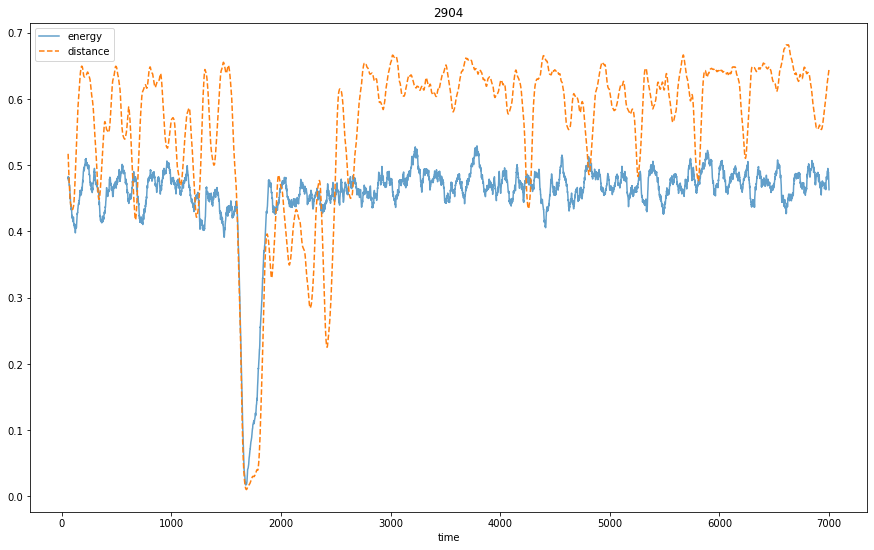

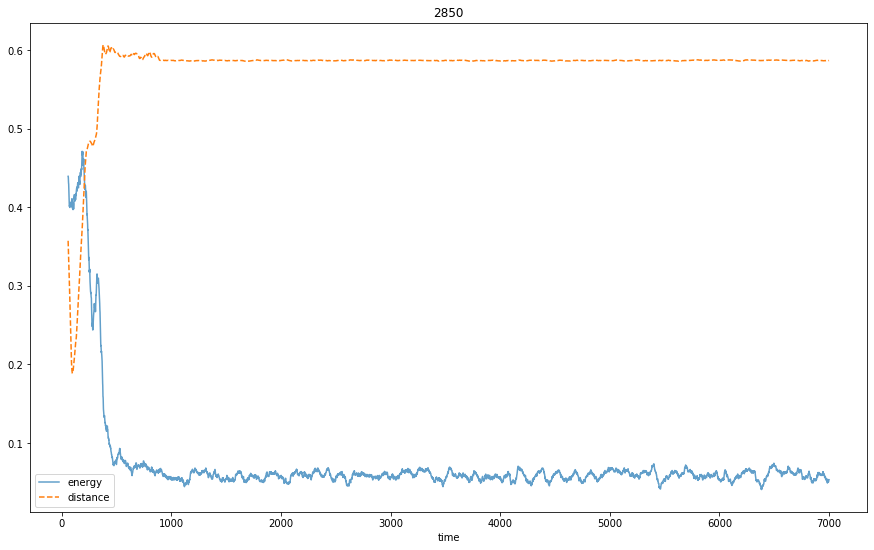

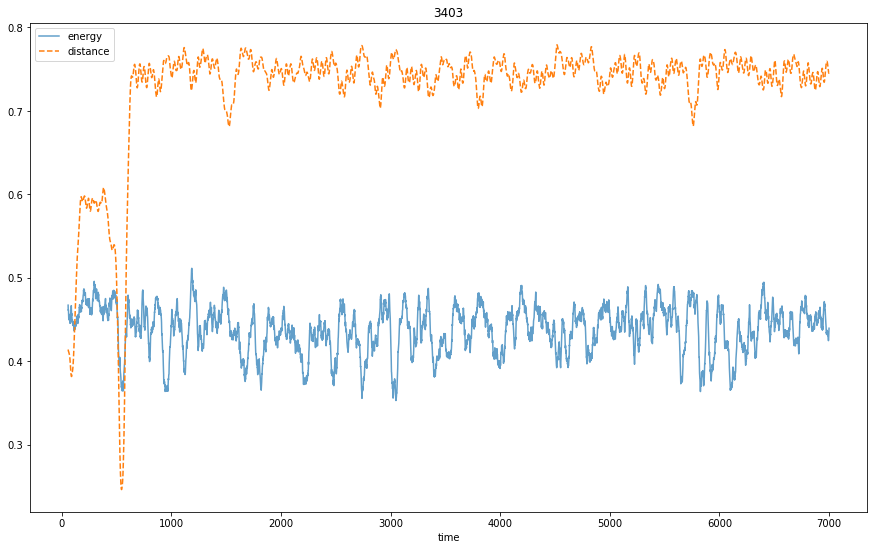

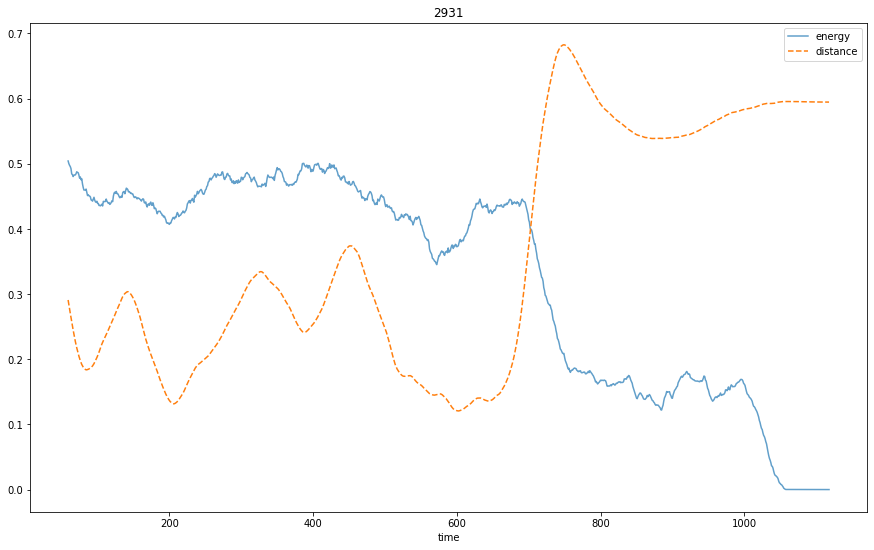

In [10]:
okabe_ito = ['#E69F00','#56B4E9','#009E73','#0072B2','#D55E00','#CC79A7']

e_files = ['energy_010_6999_0.04_20190816192904.dat','energy_010_6999_0.04_20190816192850.dat',
            'energy_010_6999_0.04_20190816193403.dat','energy_010_1118_0.04_20190816192931.dat']
d_files = ['distance_010_6999_0.04_20190816192904.dat','distance_010_6999_0.04_20190816192850.dat',
            'distance_010_6999_0.04_20190816193403.dat','distance_010_1118_0.04_20190816192931.dat']


d_every = 1
for e,d in zip(e_files,d_files):
    plt.figure(figsize=(15,9));
    print(e,d)
    dftmp = pd.read_csv(path+e,header=None,names=['time','energy'],delim_whitespace=True)
    #if(dftmp['time'].max() > 6998):
    lbl = e[-8:-4]
    plt.plot(dftmp['time'],100*dftmp.rolling(window=60).mean()['energy'],'-',alpha=0.7,
                label='energy')#,c=okabe_ito[e_files.index(e)])
    dftmp = pd.read_csv(path+d,header=None,names=['time','distance'],delim_whitespace=True)
    plt.plot(dftmp['time'][::d_every],dftmp.rolling(window=60).mean()['distance'][::d_every],'--',
                label='distance')#,c=okabe_ito[d_files.index(d)])
    plt.title(lbl)
    plt.xlabel("time")
    #plt.ylabel("energy")
    plt.legend()
    plt.savefig("img/energy_in_time"+e[-8:-4]+".png",dpi=400)

energy_010_6999_0.04_20190816192904.dat 6999
energy_010_6999_0.04_20190816192850.dat 6999
energy_010_6999_0.04_20190816193403.dat 6999
energy_010_1118_0.04_20190816192931.dat 1118


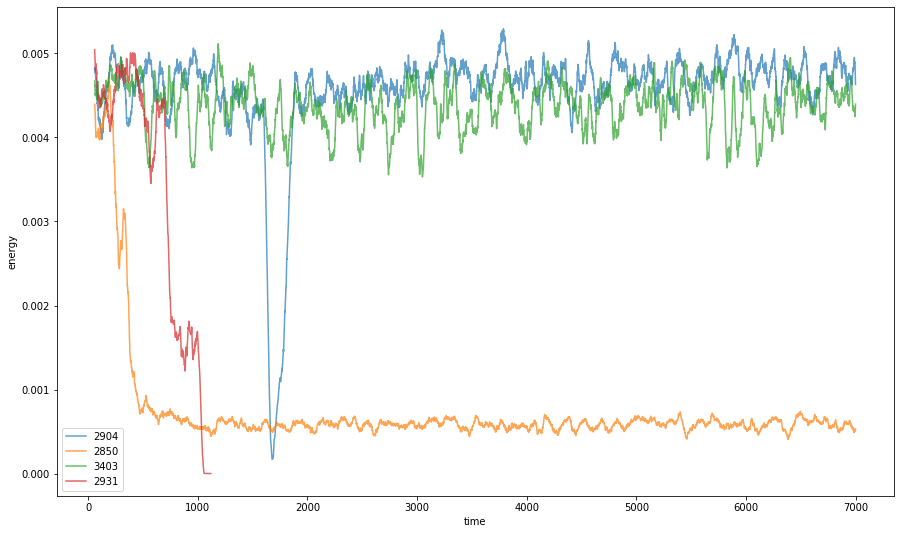

In [11]:
plt.figure(figsize=(15,9));

for file in ['energy_010_6999_0.04_20190816192904.dat','energy_010_6999_0.04_20190816192850.dat',
            'energy_010_6999_0.04_20190816193403.dat','energy_010_1118_0.04_20190816192931.dat']:
    dftmp = pd.read_csv(path+file,header=None,names=['time','energy'],delim_whitespace=True)
    #if(dftmp['time'].max() > 6998):
    lbl = file[-8:-4]
    plt.plot(dftmp['time'],dftmp.rolling(window=60).mean()['energy'],'-',alpha=0.7,
                label=lbl)
    print(file, dftmp['time'].max())
    
    
plt.xlabel("time")
plt.ylabel("energy")
plt.legend()
plt.savefig("img/energy_in_time.png",dpi=400)


distance_010_6999_0.04_20190816192904.dat
distance_010_6999_0.04_20190816192850.dat
distance_010_6999_0.04_20190816193403.dat
distance_010_1118_0.04_20190816192931.dat


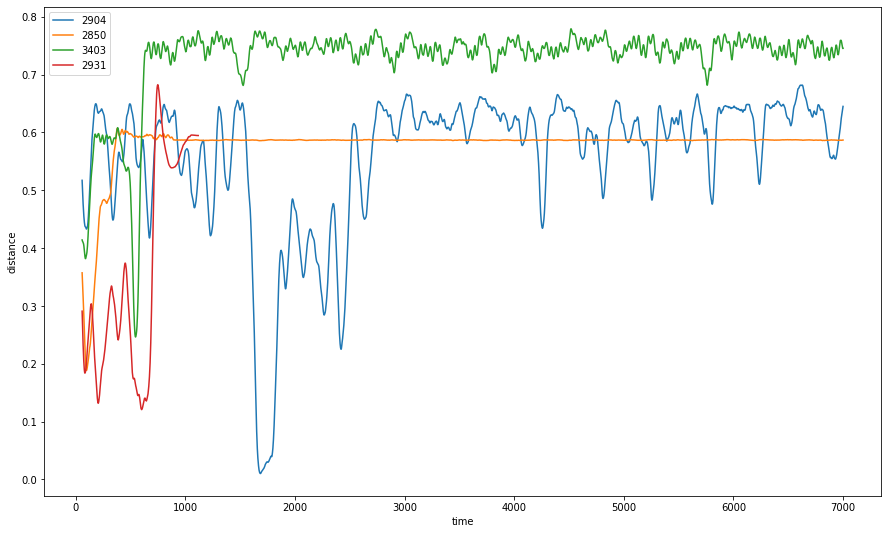

In [12]:
plt.figure(figsize=(15,9));

for file in ['distance_010_6999_0.04_20190816192904.dat','distance_010_6999_0.04_20190816192850.dat',
            'distance_010_6999_0.04_20190816193403.dat','distance_010_1118_0.04_20190816192931.dat']:
    dftmp = pd.read_csv(path+file,header=None,names=['time','distance'],delim_whitespace=True)
    plt.plot(dftmp['time'],dftmp.rolling(window=60).mean()['distance'],'-',
                label=file[-8:-4])
    print(file)
    
plt.xlabel("time")
plt.ylabel("distance")
plt.legend()
#plt.show()
plt.savefig("img/distance_in_time.png",dpi=200)

energy_010_1000_0.04_20190816192856.dat distance_010_1000_0.04_20190816192856.dat


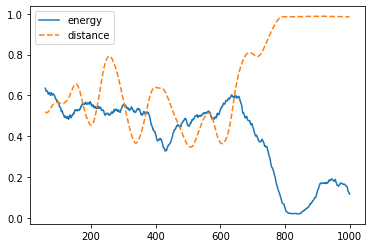

energy_010_1009_0.04_20190816192809.dat distance_010_1009_0.04_20190816192809.dat


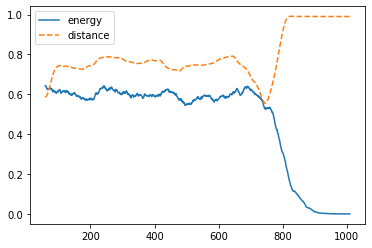

energy_010_103_0.04_20190816193216.dat distance_010_103_0.04_20190816193216.dat


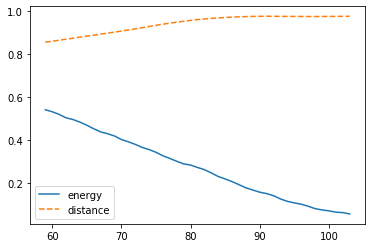

energy_010_104_0.04_20190816192740.dat distance_010_104_0.04_20190816192740.dat


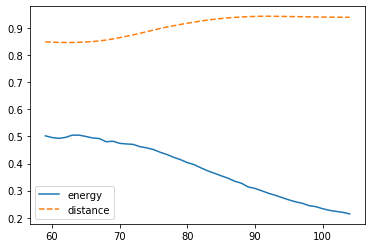

energy_010_105_0.04_20190816193104.dat distance_010_105_0.04_20190816193104.dat


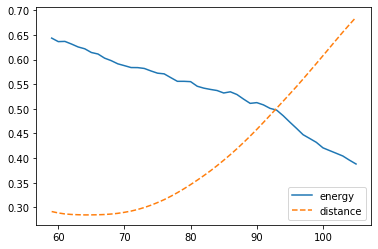

energy_010_105_0.04_20190816193228.dat distance_010_105_0.04_20190816193228.dat


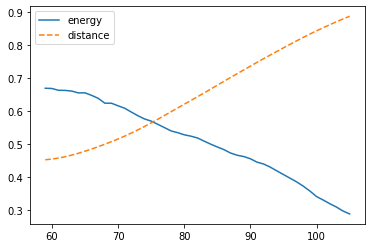

energy_010_1062_0.04_20190816193249.dat distance_010_1062_0.04_20190816193249.dat


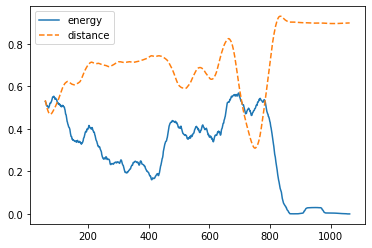

energy_010_106_0.04_20190816193107.dat distance_010_106_0.04_20190816193107.dat


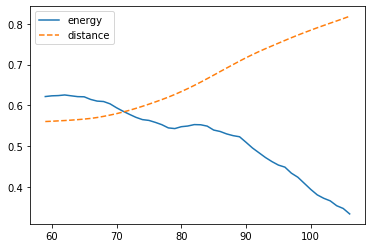

energy_010_107_0.04_20190816193311.dat distance_010_107_0.04_20190816193311.dat


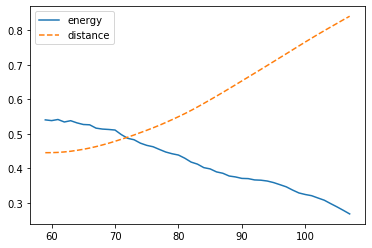

energy_010_108_0.04_20190816193245.dat distance_010_108_0.04_20190816193245.dat


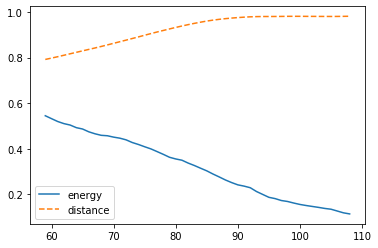

KeyboardInterrupt: 

In [13]:
#i = 150
import time
for i in range(len(energy_files)):
    e=energy_files[i]
    d=distance_files[i]
    print(e,d)
    dftmp = pd.read_csv(path+e,header=None,names=['time','energy'],delim_whitespace=True)
    plt.plot(dftmp['time'],dftmp.rolling(window=60).mean()['energy']/dftmp['energy'].max(),label='energy')
    dftmp = pd.read_csv(path+d,header=None,names=['time','distance'],delim_whitespace=True)
    plt.plot(dftmp['time'],dftmp.rolling(window=60).mean()['distance']/dftmp['distance'].max(),'--',label='distance')
    plt.legend()
    plt.show()
    time.sleep(1) 

In [ ]:
def make_frames(posname,enename,datetime):
    dfen = pd.read_csv(enename,header=None,names=['time','energy'],delim_whitespace=True)


    f = open(posname)
    blocks = []
    blockx = []
    blocky = []
    for line in f:
        if line.isspace():
            blocks.append((blockx,blocky))
            blockx = []
            blocky = []
        else:
            nums = line.split(' ')
            blockx.append(float(nums[0]))
            blocky.append(float(nums[1]))

            #blocks = numpy.array(blocks)
            #print(blocks)

            #plt.plot(blocks[0][0],blocks[0][1],'o')


    for i in range(1,len(blocks)):
        b = blocks[i]
        b_old = blocks[i-1]
        plt.clf()
        plt.axis((-0.1,1.1,-0.1,1.1))
        plt.plot(b[0],b[1],'o',color='orange')
        plt.plot(b_old[0],b_old[1],'o',color='orange',alpha=0.5)
        plt.plot(dfen['time']/dfen['time'].max(),dfen.rolling(window=60).mean()['energy']/dfen['energy'].max(),
                 color='grey',alpha=0.5)
        plt.plot(dfen.loc[dfen['time']<i]['time']/dfen['time'].max(),
                 dfen.loc[dfen['time']<i].rolling(window=60).mean()['energy']/dfen['energy'].max())
        name = "img/gif/"+datetime+"gif_"+str((f"{i:04d}"))+".png"
        print(name)
        plt.savefig(name)




In [ ]:
file_names = [#{'e':"energy_010_6999_0.04_20190816192904.dat",
               #'p':"positions_010_6999_0.04_"+datetime+".dat"},
             {'e':'energy_010_1118_0.04_20190816192931.dat',
             'p':'positions_010_1118_0.04_20190816192931.dat'},
             {'e':'energy_010_1150_0.04_20190816193243.dat',
             'p':'positions_010_1150_0.04_20190816193243.dat'},
             {'e':'energy_010_1196_0.04_20190816193306.dat',
             'p':'positions_010_1196_0.04_20190816193306.dat'}]
for f in file_names:
    make_frames(enename='data/'+f['e'],posname='data/'+f['p'],datetime=f['p'][-18:-4])